# Name : Kartabya Krishna
# Registration Number: 210968244
**Week:** 8

**Topic:** Neural Machine Translation (NMT) using Encoder-Decoder Architecture


In [15]:
# Import the 're' library for regular expressions
import re

# Import 'pandas' library for data manipulation
import pandas as pd

# Import 'numpy' for numerical operations
import numpy as np

# Import 'LabelEncoder' for encoding categorical labels
from sklearn.preprocessing import LabelEncoder

# Import 'train_test_split' for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# Import 'Tokenizer' for text tokenization
from keras.preprocessing.text import Tokenizer

# Import 'keras' for deep learning modeling
import keras

# Import 'classification_report' for generating classification reports
from sklearn.metrics import classification_report

# Import 'accuracy_score' for calculating accuracy metrics
from sklearn.metrics import accuracy_score

# Import 'math' for mathematical operations
import math

# Import 'nltk' for natural language processing tasks
import nltk

# Import 'csv' for reading and writing CSV files
import csv

# Import 'FreqDist' for frequency distribution analysis
from nltk import FreqDist

# Import 'bigrams' for generating bigrams from text
from nltk import bigrams

# Import 'WordCloud' for creating word clouds
from wordcloud import WordCloud

# Import 'pyplot' from 'matplotlib' for data visualization
import matplotlib.pyplot as plt

# Import 'stopwords' from 'nltk.corpus' for handling common stopwords
from nltk.corpus import stopwords

# Import 'word_tokenize' from 'nltk.tokenize' for word tokenization
from nltk.tokenize import word_tokenize


In [2]:
from keras.models import Model
from keras.layers import Input, LSTM, GRU, Dense

In [3]:
!!curl -O http://www.manythings.org/anki/hin-eng.zip
!!unzip hin-eng.zip

['Archive:  hin-eng.zip',
 '  inflating: hin.txt                 ',
 '  inflating: _about.txt              ']

In [4]:
batch_size = 64  # Batch size for training.
epochs = 100  # Number of epochs to train for.
latent_dim = 256  # Latent dimensionality of the encoding space.
num_samples = 10000  # Number of samples to train on.
# Path to the data txt file on disk.
data_path = "hin.txt"

# Data Preprocessing:

- The code performs preprocessing on a bilingual dataset containing English and Hindi sentences.

## Loading the Data:

- The data is loaded from a file specified by `data_path` using the `open()` function.
- The file is read and split into lines, with each line representing a pair of English and Hindi sentences.

## Splitting English and Hindi Texts:

- Two lists, `english_texts` and `hindi_texts`, are created to store English and Hindi sentences, respectively.
- A loop iterates through the lines, and for each line with a tab character ('\t'), it splits the line into English and Hindi parts.
- English and Hindi sentences are extracted and appended to their respective lists.

## Tokenization:

- For both English and Hindi sentences:
  - Tokenizers (`english_tokenizer` and `hindi_tokenizer`) are created using the `Tokenizer()` class from TensorFlow Keras.
  - The tokenizers are fit on the sentences using the `fit_on_texts()` method to build vocabulary.
  - The `texts_to_sequences()` method is used to convert sentences into sequences of integers based on the learned vocabulary.
  
## Padding Sequences:

- The sequences of integers for both English and Hindi sentences are padded using `pad_sequences()`.
- Padding is done with 'post' padding, meaning zeros are added at the end of sequences to make them uniform in length.

- After preprocessing, you have:
  - `english_data`: Padded sequences of English sentences
  - `hindi_data`: Padded sequences of Hindi sentences

This preprocessing prepares the data for training a machine translation model, where sentences are tokenized and padded for uniformity in sequence lengths.


In [5]:
# preprocessing of the data
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the data
with open(data_path, 'r', encoding='utf-8') as f:
    lines = f.read().split('\n')

# Split the data into English and Hindi parts
english_texts = []
hindi_texts = []
for line in lines:
    if '\t' in line:
        english_text, hindi_text = line.split('\t')[0], line.split('\t')[1]
        english_texts.append(english_text)
        hindi_texts.append(hindi_text)

# Tokenize the English sentences
english_tokenizer = Tokenizer()
english_tokenizer.fit_on_texts(english_texts)
english_sequences = english_tokenizer.texts_to_sequences(english_texts)

# Tokenize the Hindi sentences
hindi_tokenizer = Tokenizer()
hindi_tokenizer.fit_on_texts(hindi_texts)
hindi_sequences = hindi_tokenizer.texts_to_sequences(hindi_texts)

# Pad the sequences
english_data = pad_sequences(english_sequences, padding='post')
hindi_data = pad_sequences(hindi_sequences, padding='post')


# Data Preprocessing:

- The code performs preprocessing on a dataset containing pairs of input and target texts.

## Loading and Parsing the Data:

- The data is loaded from a file specified by `data_path` using the `open()` function.
- The file content is split into lines using the newline character '\n'.

## Creating Lists for Input and Target Texts:

- Two lists, `input_texts` and `target_texts`, are initialized to store the input and target texts, respectively.

## Tokenizing Input and Target Texts:

- For each line in the data, the input and target texts are extracted by splitting on the tab character ('\t').
- The target text is modified by adding a "start sequence" character ('\t') at the beginning and an "end sequence" character ('\n') at the end.
- Input and target texts are appended to their respective lists.

## Collecting Unique Characters:

- Two sets, `input_characters` and `target_characters`, are created to collect unique characters from input and target texts.

## Calculating Statistics:

- Statistics about the data are computed and printed:
  - Number of samples
  - Number of unique input tokens (characters)
  - Number of unique output tokens (characters)
  - Maximum sequence length for inputs
  - Maximum sequence length for outputs

## Token Index Dictionaries:

- Dictionaries `input_token_index` and `target_token_index` are created to map characters to their integer indices.

## One-Hot Encoding Sequences:

- Arrays `encoder_input_data`, `decoder_input_data`, and `decoder_target_data` are initialized with zeros.
- For each sample in the data, one-hot encoding is applied to populate the arrays.
- The sequences are one-hot encoded, with "1.0" indicating the presence of a character.
- Padding is added to ensure sequences have the same length.

This preprocessing prepares the data for training a sequence-to-sequence model, where input and target texts are converted into numerical format suitable for deep learning models.


In [6]:
input_texts = []
target_texts = []
input_characters = set()
target_characters = set()
with open(data_path, "r", encoding="utf-8") as f:
    lines = f.read().split("\n")
for line in lines[: min(num_samples, len(lines) - 1)]:
    input_text, target_text, _ = line.split("\t")
    # We use "tab" as the "start sequence" character
    # for the targets, and "\n" as "end sequence" character.
    target_text = "\t" + target_text + "\n"
    input_texts.append(input_text)
    target_texts.append(target_text)
    for char in input_text:
        if char not in input_characters:
            input_characters.add(char)
    for char in target_text:
        if char not in target_characters:
            target_characters.add(char)

input_characters = sorted(list(input_characters))
target_characters = sorted(list(target_characters))
num_encoder_tokens = len(input_characters)
num_decoder_tokens = len(target_characters)
max_encoder_seq_length = max([len(txt) for txt in input_texts])
max_decoder_seq_length = max([len(txt) for txt in target_texts])

print("Number of samples:", len(input_texts))
print("Number of unique input tokens:", num_encoder_tokens)
print("Number of unique output tokens:", num_decoder_tokens)
print("Max sequence length for inputs:", max_encoder_seq_length)
print("Max sequence length for outputs:", max_decoder_seq_length)

input_token_index = dict([(char, i) for i, char in enumerate(input_characters)])
target_token_index = dict([(char, i) for i, char in enumerate(target_characters)])

encoder_input_data = np.zeros(
    (len(input_texts), max_encoder_seq_length, num_encoder_tokens), dtype="float32"
)
decoder_input_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens), dtype="float32"
)
decoder_target_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens), dtype="float32"
)

for i, (input_text, target_text) in enumerate(zip(input_texts, target_texts)):
    for t, char in enumerate(input_text):
        encoder_input_data[i, t, input_token_index[char]] = 1.0
    encoder_input_data[i, t + 1 :, input_token_index[" "]] = 1.0
    for t, char in enumerate(target_text):
        # decoder_target_data is ahead of decoder_input_data by one timestep
        decoder_input_data[i, t, target_token_index[char]] = 1.0
        if t > 0:
            # decoder_target_data will be ahead by one timestep
            # and will not include the start character.
            decoder_target_data[i, t - 1, target_token_index[char]] = 1.0
    decoder_input_data[i, t + 1 :, target_token_index[" "]] = 1.0
    decoder_target_data[i, t:, target_token_index[" "]] = 1.0

Number of samples: 2979
Number of unique input tokens: 70
Number of unique output tokens: 90
Max sequence length for inputs: 107
Max sequence length for outputs: 123


# LSTM Model:

- This code defines a sequence-to-sequence model using Long Short-Term Memory (LSTM) layers for a machine translation or sequence generation task.

## Encoder:

- An input sequence is defined using `Input()` with shape `(None, num_encoder_tokens)`, allowing variable-length sequences.
- An LSTM layer is set up with `latent_dim` units and `return_state=True` to capture hidden states and cell states.
- The encoder LSTM processes the input sequence, producing `encoder_outputs`, `state_h`, and `state_c`.
- `encoder_outputs` are discarded, and only `state_h` and `state_c` are retained as `encoder_states`.

## Decoder:

- Another input sequence is defined for the decoder.
- A decoder LSTM layer is set up similarly to the encoder, returning both sequences and states.
- The `initial_state` for the decoder LSTM is set to the `encoder_states`, providing context from the encoder.
- A Dense layer is added to produce the output sequence with a softmax activation function.

## Model Definition:

- A complete model (`model_lstm`) is defined using the Keras functional API, taking both encoder and decoder inputs and producing decoder outputs.
- The model is compiled with RMSprop as the optimizer and categorical cross-entropy as the loss function.
- Training data (`encoder_input_data` and `decoder_input_data`) and target data (`decoder_target_data`) are provided for training.

## Model Training:

- The model is trained using `model_lstm.fit()`.
- Training includes parameters like batch size, number of epochs, and a validation split of 20%.
- Training history is stored in `history_lstm`.

This code segment defines and trains a sequence-to-sequence model using LSTM layers for a specific task, with training data provided for supervised learning.


In [8]:
# LSTM Model

# Define an input sequence and process it.
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)

# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None, num_decoder_tokens))

# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model_lstm = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model_lstm.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])
history_lstm = model_lstm.fit([encoder_input_data, decoder_input_data], decoder_target_data,
          batch_size=batch_size,
          epochs=30,
          validation_split=0.2)

Epoch 1/30
38/38 [==============================] - 5s 64ms/step - loss: 1.2629 - accuracy: 0.7860 - val_loss: 1.7724 - val_accuracy: 0.6873
Epoch 2/30
38/38 [==============================] - 2s 40ms/step - loss: 0.9171 - accuracy: 0.8072 - val_loss: 1.6154 - val_accuracy: 0.6873
Epoch 3/30
38/38 [==============================] - 2s 44ms/step - loss: 0.8378 - accuracy: 0.8092 - val_loss: 1.4151 - val_accuracy: 0.6889
Epoch 4/30
38/38 [==============================] - 2s 41ms/step - loss: 0.7913 - accuracy: 0.8112 - val_loss: 1.4402 - val_accuracy: 0.6899
Epoch 5/30
38/38 [==============================] - 2s 41ms/step - loss: 0.7528 - accuracy: 0.8138 - val_loss: 1.2731 - val_accuracy: 0.6907
Epoch 6/30
38/38 [==============================] - 2s 41ms/step - loss: 0.7071 - accuracy: 0.8233 - val_loss: 1.2485 - val_accuracy: 0.6989
Epoch 7/30
38/38 [==============================] - 2s 43ms/step - loss: 0.6455 - accuracy: 0.8385 - val_loss: 1.0713 - val_accuracy: 0.7296
Epoch 8/30
38

In [9]:
model_lstm.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, 70)]   0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, None, 90)]   0           []                               
                                                                                                  
 lstm_2 (LSTM)                  [(None, 256),        334848      ['input_3[0][0]']                
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                            

# GRU Model:

- This code replaces the LSTM layers in the previous model with Gated Recurrent Unit (GRU) layers for a sequence-to-sequence task.

## Encoder:

- An input sequence is defined using `Input()` with shape `(None, num_encoder_tokens)`, allowing variable-length sequences.
- A GRU layer is set up with `latent_dim` units and `return_state=True` to capture hidden states.
- The encoder GRU processes the input sequence, producing `encoder_outputs` and `state_h`.
- Only `state_h` is retained as `encoder_states_gru`.

## Decoder:

- Another input sequence is defined for the decoder.
- A decoder GRU layer is set up similarly to the encoder, returning sequences and states.
- The `initial_state` for the decoder GRU is set to the `encoder_states_gru`, providing context from the encoder.
- A Dense layer is added to produce the output sequence with a softmax activation function.

## Model Definition:

- A complete model (`model_gru`) is defined using the Keras functional API, taking both encoder and decoder inputs and producing decoder outputs.
- The model is compiled with RMSprop as the optimizer and categorical cross-entropy as the loss function.

## Model Training:

- The model is trained using `model_gru.fit()`.
- Training includes parameters like batch size, number of epochs, and a validation split of 20%.
- Training history is stored in `history_gru`.

This code segment defines and trains a sequence-to-sequence model using GRU layers for a specific task, with training data provided for supervised learning.


In [10]:
# Replace LSTM with GRU
encoder_gru = GRU(latent_dim, return_state=True)
encoder_outputs, state_h = encoder_gru(encoder_inputs)

encoder_states_gru = [state_h]

decoder_gru = GRU(latent_dim, return_sequences=True, return_state=True)
decoder_outputs_gru, _ = decoder_gru(decoder_inputs,
                                     initial_state=encoder_states_gru)
decoder_dense_gru = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs_gru = decoder_dense_gru(decoder_outputs_gru)

model_gru = Model([encoder_inputs, decoder_inputs], decoder_outputs_gru)

model_gru.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])
history_gru = model_gru.fit([encoder_input_data, decoder_input_data], decoder_target_data,
          batch_size=batch_size,
          epochs=30,
          validation_split=0.2)

Epoch 1/30
38/38 [==============================] - 5s 61ms/step - loss: 1.3308 - accuracy: 0.7872 - val_loss: 1.8573 - val_accuracy: 0.6869
Epoch 2/30
38/38 [==============================] - 2s 44ms/step - loss: 0.9177 - accuracy: 0.8083 - val_loss: 1.6094 - val_accuracy: 0.6875
Epoch 3/30
38/38 [==============================] - 2s 43ms/step - loss: 0.7977 - accuracy: 0.8096 - val_loss: 1.2887 - val_accuracy: 0.6893
Epoch 4/30
38/38 [==============================] - 2s 45ms/step - loss: 0.7468 - accuracy: 0.8169 - val_loss: 1.1965 - val_accuracy: 0.7012
Epoch 5/30
38/38 [==============================] - 1s 38ms/step - loss: 0.6881 - accuracy: 0.8296 - val_loss: 1.1150 - val_accuracy: 0.7147
Epoch 6/30
38/38 [==============================] - 1s 35ms/step - loss: 0.6156 - accuracy: 0.8433 - val_loss: 1.0311 - val_accuracy: 0.7396
Epoch 7/30
38/38 [==============================] - 1s 34ms/step - loss: 0.5705 - accuracy: 0.8519 - val_loss: 0.9770 - val_accuracy: 0.7415
Epoch 8/30
38

In [11]:
model_gru.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, 70)]   0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, None, 90)]   0           []                               
                                                                                                  
 gru (GRU)                      [(None, 256),        251904      ['input_3[0][0]']                
                                 (None, 256)]                                                     
                                                                                                  
 gru_1 (GRU)                    [(None, None, 256),  267264      ['input_4[0][0]',          

In [12]:
import matplotlib.pyplot as plt

# Evaluate LSTM model
lstm_scores = model_lstm.evaluate([encoder_input_data, decoder_input_data], decoder_target_data, verbose=0)
print('LSTM Model:')
print('Test loss:', lstm_scores[0])
print('Test accuracy:', lstm_scores[1])

LSTM Model:
Test loss: 0.4517027735710144
Test accuracy: 0.8738923072814941


In [13]:
# Evaluate GRU model
gru_scores = model_gru.evaluate([encoder_input_data, decoder_input_data], decoder_target_data, verbose=0)
print('\nGRU Model:')
print('Test loss:', gru_scores[0])
print('Test accuracy:', gru_scores[1])


GRU Model:
Test loss: 0.42625531554222107
Test accuracy: 0.8802703022956848


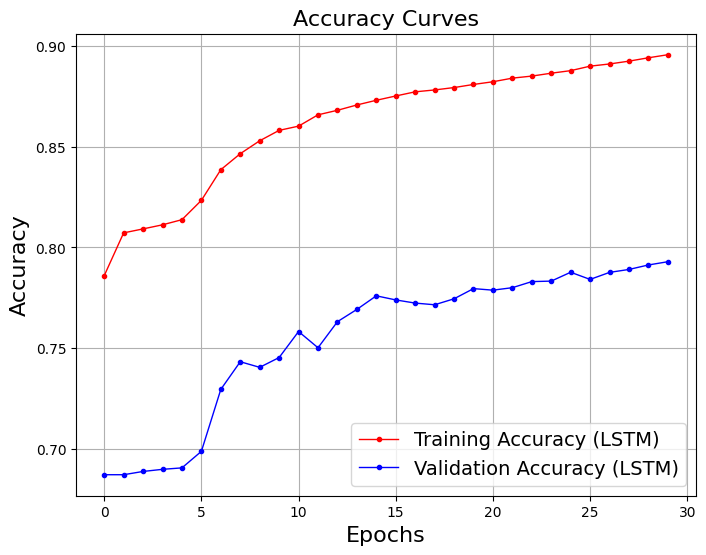

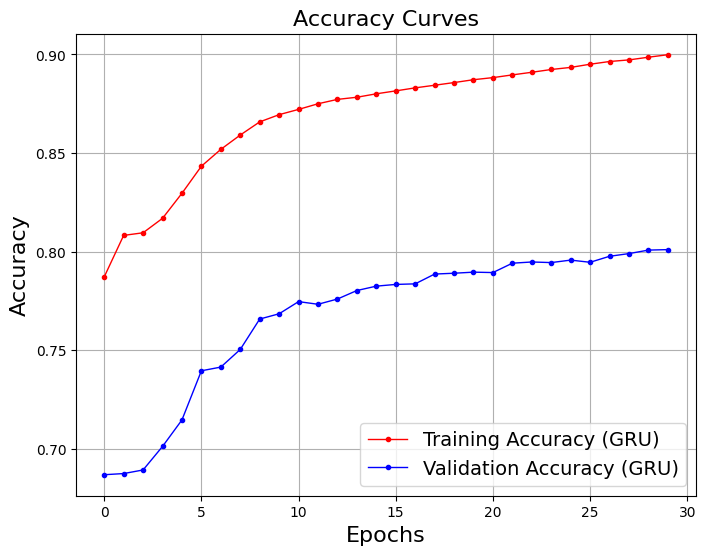

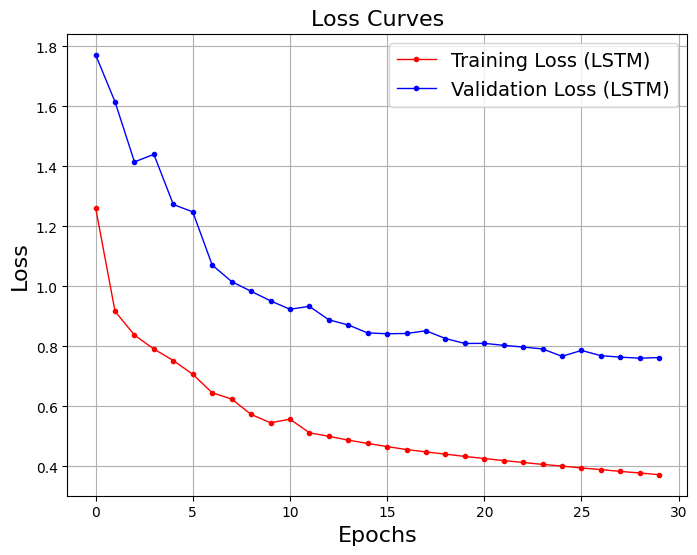

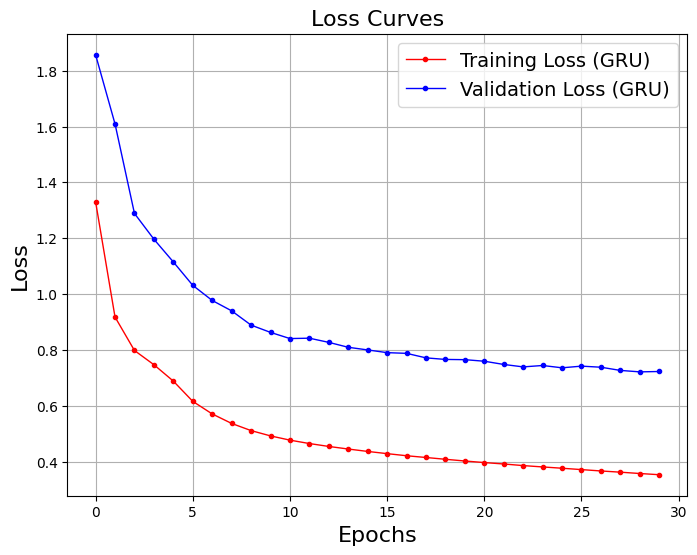

In [14]:
# Plot accuracy and loss for LSTM and GRU models
plt.figure(figsize=[8,6])
plt.plot(history_lstm.history['accuracy'],'r-', marker='.', linewidth=1.0)
plt.plot(history_lstm.history['val_accuracy'],'b-', marker='.', linewidth=1.0)
plt.legend(['Training Accuracy (LSTM)', 'Validation Accuracy (LSTM)'],fontsize=14)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.grid(True)

plt.figure(figsize=[8,6])
plt.plot(history_gru.history['accuracy'],'r-', marker='.', linewidth=1.0)
plt.plot(history_gru.history['val_accuracy'],'b-', marker='.', linewidth=1.0)
plt.legend(['Training Accuracy (GRU)', 'Validation Accuracy (GRU)'],fontsize=14)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.grid(True)

plt.figure(figsize=[8,6])
plt.plot(history_lstm.history['loss'],'r-', marker='.', linewidth=1.0)
plt.plot(history_lstm.history['val_loss'],'b-', marker='.', linewidth=1.0)
plt.legend(['Training Loss (LSTM)', 'Validation Loss (LSTM)'],fontsize=14)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.grid(True)

plt.figure(figsize=[8,6])
plt.plot(history_gru.history['loss'],'r-', marker='.', linewidth=1.0)
plt.plot(history_gru.history['val_loss'],'b-', marker='.', linewidth=1.0)
plt.legend(['Training Loss (GRU)', 'Validation Loss (GRU)'],fontsize=14)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.grid(True)